# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import types
from botocore.client import Config
import ibm_boto3

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)

numpy 1.15.4
pandas 0.24.1
matplotlib 3.0.2
seaborn 0.9.0


# Importing the dataset

In [2]:
def __iter__(self): return 0
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_292971b0a3b34e96a8e6af888f2b6cdc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p9cmVrktMAvH9ciFXkYAOdU2vrA72b7FZ6FEK_ktF3zf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_292971b0a3b34e96a8e6af888f2b6cdc.get_object(Bucket='predictingtheenergyoutputofwindtu-donotdelete-pr-abijcbrcu8rwl8',Key='Dataset.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [3]:
dataset = pd.read_excel(body)
dataset.head()

,Date/Time,Day(D)/Mounth(M),Hour(H)/Minute(M),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW)
0,01 01 2018 00:00,11,0,5.311336,416.328908,259.994904,380.047791
1,01 01 2018 00:10,11,10,5.672167,519.917511,268.641113,453.769196
2,01 01 2018 00:20,11,20,5.216037,390.900016,272.564789,306.376587
3,01 01 2018 00:30,11,30,5.659674,516.127569,271.258087,419.645905
4,01 01 2018 00:40,11,40,5.577941,491.702972,265.674286,380.650696


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 7 columns):
Date/Time                        50530 non-null object
Day(D)/Mounth(M)                 50530 non-null int64
Hour(H)/Minute(M)                50530 non-null int64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
LV ActivePower (kW)              50530 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.7+ MB


In [5]:
dataset.describe()

,Day(D)/Mounth(M),Hour(H)/Minute(M),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW)
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000
mean,522.504789,1003.969919,7.557952,1492.175463,123.687559,1307.684332
std,776.911447,748.121584,4.227166,1368.018238,93.443736,1312.459242
min,11.000000,0.000000,0.000000,0.000000,0.000000,-2.471405
25%,108.000000,230.000000,4.201395,161.328167,49.315437,50.677890
50%,204.000000,940.000000,7.104594,1063.776283,73.712978,825.838074
75%,307.000000,1650.000000,10.300020,2964.972462,201.696720,2482.507568
max,3112.000000,2350.000000,25.206011,3600.000000,359.997589,3618.732910


In [6]:
#checks out how many null info are on the dataset
dataset.isnull().sum()

Date/Time                        0
Day(D)/Mounth(M)                 0
Hour(H)/Minute(M)                0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
LV ActivePower (kW)              0
dtype: int64

# Data Visualization

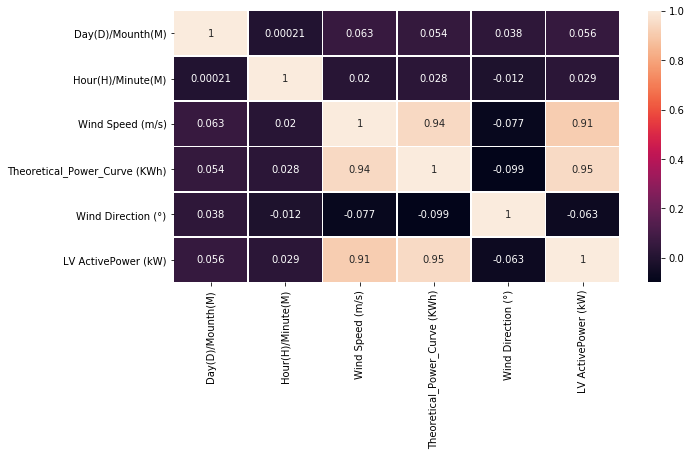

In [7]:
# plot corelation
ig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax)

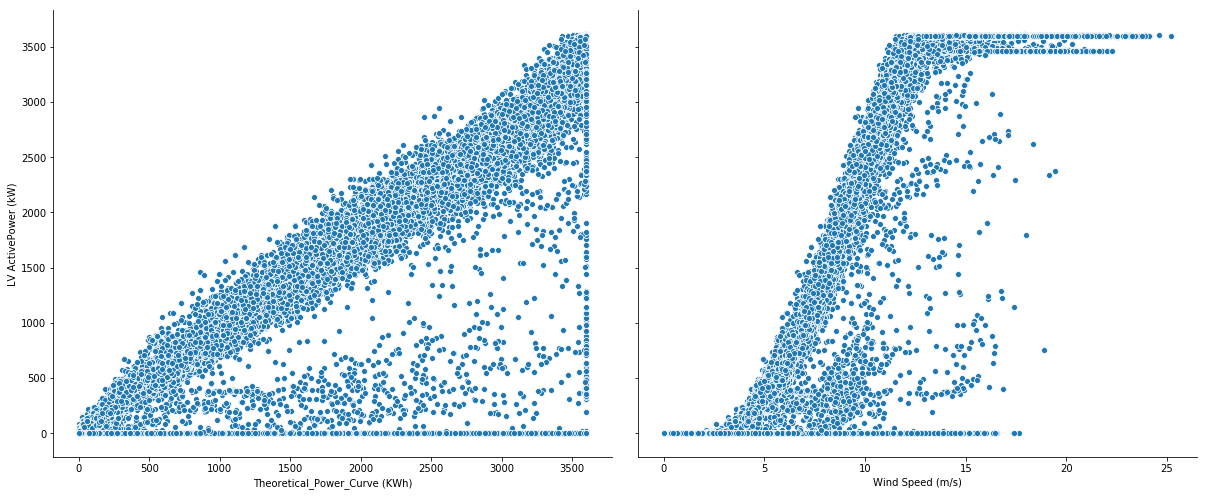

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)'],
             y_vars='LV ActivePower (kW)', height=7, aspect=1.2)

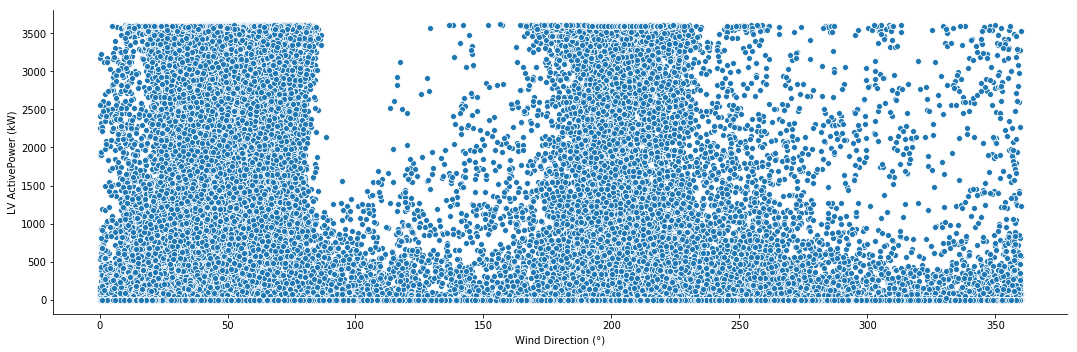

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Wind Direction (°)'], y_vars='LV ActivePower (kW)', height=5, aspect=3)

# Data Preprocessing

In [10]:
# Splitting the dataset into X and Y
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, -1].values
print('Shape of X =', X.shape)
print('Shape of y =', y.shape)

Shape of X = (50530, 4)
Shape of y = (50530,)


In [11]:
import statsmodels.api as sm
results = sm.OLS(y, X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 2.445e+05
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:48:28   Log-Likelihood:            -3.7577e+05
No. Observations:               50530   AIC:                         7.515e+05
Df Residuals:                   50526   BIC:                         7.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0110      0.002     -4.749      0.000      -0.016      -0.006
x2            -0.0323      0.002    -14.677      0.000      -0.037      -0.028
x3             9.8665      0.878     11.242      0.000       8.146      11.587
x4             0.8663      0.003    265.436      0.000       0.860       0.873
==============================================================================
Omnibus:                    47015.621   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1702807.510
Skew:                          -4.616   Prob(JB):                         0.00
Kurtosis:                      29.898   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Train set size is', y_train.size)
print('Test set size is', y_test.size)

Train set size is 40424
Test set size is 10106


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Finding sutable regression model

In [14]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [17]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Printing the Accuracies

In [18]:
regression = {0:'LinearRegression', 1:'SVR', 2:'DecisionTreeRegressor', 3:'RandomForestRegressor'}
reg = {0:linr, 1:svr, 2:dtr, 3:rfr}
y_pred = {0:'y_lin', 1:'y_svr', 2:'y_dtr', 3:'y_rfr'}

In [28]:
for i in range(0, 4):
    print('\n\n-------------------------------------------------------------------------------')
    print('Type of regression model: {}'.format(regression[i]))
    # Predicting a new result
    y_pred[i] = reg[i].predict(X_test)
    # calculate MAE, MSE, RMSE and r2
    import sklearn.metrics as metrics
    print('Mean Absolute Error (MAE) = ',metrics.mean_absolute_error(y_test, y_pred[i]))
    print('Mean Squared Error (MSE) = ',metrics.mean_squared_error(y_test, y_pred[i]))
    print('Root Mean Squared Error (RMSE) = ',np.sqrt(metrics.mean_squared_error(y_test, y_pred[i])))
    print('R2 Score = ',metrics.r2_score(y_test, y_pred[i]))
    print('-------------------------------------------------------------------------------')



-------------------------------------------------------------------------------
Type of regression model: LinearRegression
Mean Absolute Error (MAE) =  185.95127694005356
Mean Squared Error (MSE) =  164916.87875985794
Root Mean Squared Error (RMSE) =  406.0995921690367
R2 Score =  0.9050882785890193
-------------------------------------------------------------------------------


-------------------------------------------------------------------------------
Type of regression model: SVR
Mean Absolute Error (MAE) =  210.43219342597394
Mean Squared Error (MSE) =  209347.4258410589
Root Mean Squared Error (RMSE) =  457.54499870620253
R2 Score =  0.8795179443793298
-------------------------------------------------------------------------------


-------------------------------------------------------------------------------
Type of regression model: DecisionTreeRegressor
Mean Absolute Error (MAE) =  118.33398042810407
Mean Squared Error (MSE) =  104687.09006893294
Root Mean Squared Erro

In [20]:
# Applying k-Fold Cross Validation (Which has lower RMSE)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 10)
print('Accuracies mean = ',accuracies.mean())
print('Accuracies standard deviation = ' ,accuracies.std())

Accuracies mean =  0.9583032665483249
Accuracies standard deviation =  0.0039560034605757195


In [21]:
# Return the coefficient of determination R^2 of the prediction.
# R^2 of self.predict(X) wrt. y.
rfr.score(X_train, y_train)

0.9928722041035778

# Applying Grid Search to find the best parameters

In [22]:
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 11, 12, 13, 14]}]
grid_search = GridSearchCV(estimator = rfr,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

-69122.97454867422
{'n_estimators': 14}


In [24]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 20, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
# Applying k-Fold Cross Validation (Which has lower RMSE)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 10)
print('Accuracies mean = ',accuracies.mean())
print('Accuracies standard deviation = ' ,accuracies.std())

Accuracies mean =  0.960419816301249
Accuracies standard deviation =  0.004392074870694134


# Predicting and Visualization of Output

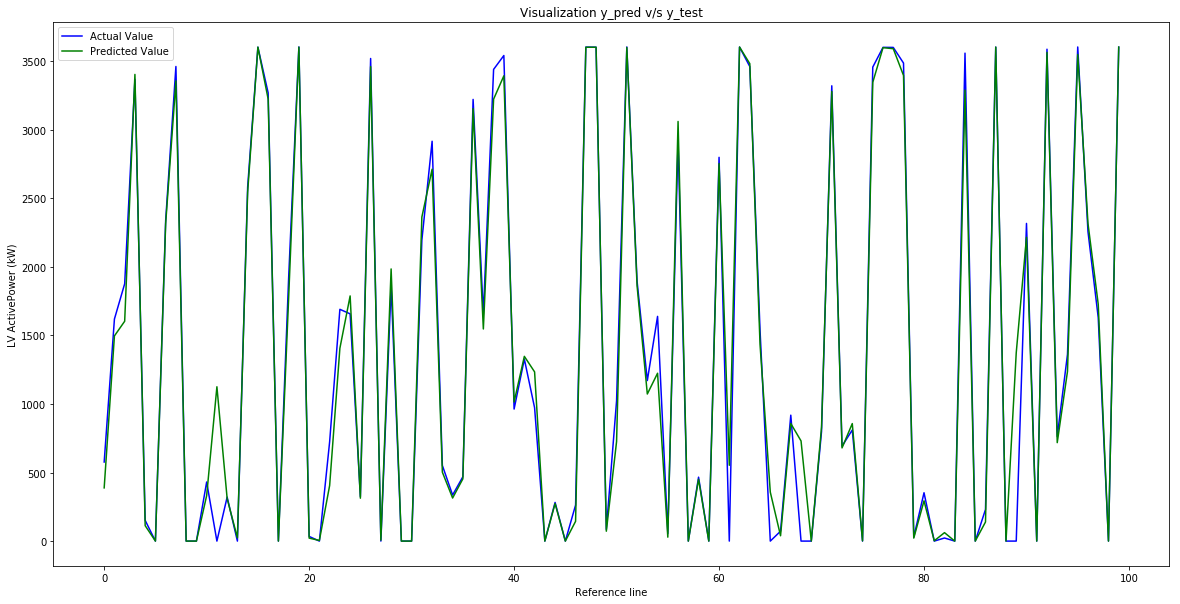

In [26]:
# Plot y_pred v/s y_test
y_rfr = rfr.predict(X_test)
b = np.arange(100)
plt.figure(figsize=(20,10))
plt.plot(b, y_test[:100], color='blue', label='Actual Value') 
plt.plot(b, y_rfr[:100], color='green', label='Predicted Value')
plt.title('Visualization y_pred v/s y_test')
plt.xlabel('Reference line')
plt.ylabel('LV ActivePower (kW)')
plt.legend()
plt.show()

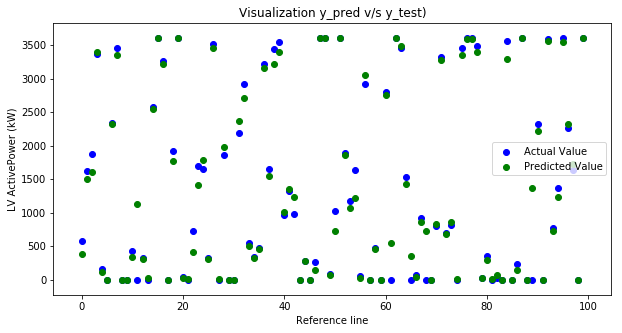

In [27]:
# Plot y_pred v/s y_test
plt.figure(figsize=(10,5))
plt.scatter(b, y_test[:100], color='blue', label='Actual Value') 
plt.scatter(b, y_rfr[:100], color='green', label='Predicted Value')
plt.title('Visualization y_pred v/s y_test)')
plt.xlabel('Reference line')
plt.ylabel('LV ActivePower (kW)')
plt.legend()
plt.show()